**Assignment 2
Model Implementation - Linear Regression**

Step 1 - Setup the environment by improting all the necessary libraries.

In [1]:
# Required Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Step 2 - Load the dataset and handle data processing

In [2]:
# Load Dataset
data = pd.read_csv('MelbourneOlympicPark_combined_output.csv')
# View the first few rows of the dataset
print(data.head())

# Drop missing values
data = data[['rel-humidity', 'air_temperature', 'wind_spd', 'msl_pres', 'rainfall']].dropna()


                  time-local  maximum_gust_kmh  air_temperature  \
0  2018-01-01T18:00:00+11:00              35.0             21.0   
1  2018-01-01T18:10:00+11:00              35.0             20.8   
2  2018-01-01T18:20:00+11:00              35.0             21.1   
3  2018-01-01T18:30:00+11:00              35.0             20.6   
4  2018-01-01T18:40:00+11:00              35.0             20.5   

   maximum_gust_spd  msl_pres  minimum_air_temperature maximum_gust_dir  \
0              19.0    1006.5                     20.8              SSW   
1              19.0       NaN                     20.6              SSW   
2              19.0       NaN                     20.4              SSW   
3              19.0    1006.7                     20.4              SSW   
4              19.0       NaN                     20.4              SSW   

   wind_dir_deg    pres  rainfall  ...  vis_km  wind_spd  wind_dir  \
0           187  1006.5       0.0  ...    10.0        10         S   
1     

Step 3 - Feature selection

In [14]:
# Define independent (X) and dependent (y) variables
features = ['rel-humidity', 'wind_spd', 'msl_pres', 'rainfall']
X = data[features]
y = data['air_temperature'] # Temperature as the target

# Handle missing values
data = data.dropna(subset=features + [y.name])


Step 4 - Splitting the data in to training and testing sets

In [15]:
# Train-test split
split_index = int(len(data) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

Step 5 - Training the Linear Regression model

In [16]:
# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Step 6 - Making predictions and evaluate the model

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')

# Evaluate model performance (r2_score)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

Root Mean Square Error: 4.776247509318898
R-squared (R²): 0.1840662913915524


Step 7 - Visualize the results

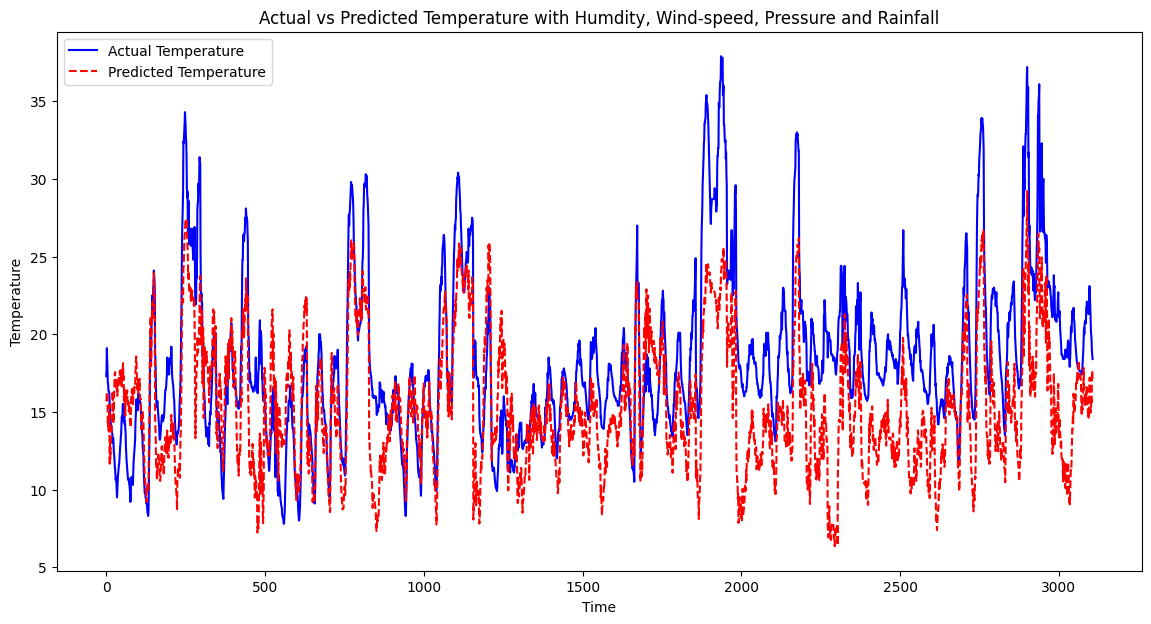

In [19]:
# plot actual vs predicted temperature
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Temperature', color='blue')
plt.plot(y_pred, label='Predicted Temperature', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature with Humdity, Wind-speed, Pressure and Rainfall')
plt.legend()
plt.show()